# Confidence intervals for model parameters:
The bootstrap resampling method can be used as a nonparametric method for
calculating condence intervals, nominally called bootstrap confidence intervals. The bootstrap
is a simulated Monte Carlo method where samples are drawn from a xed nite dataset with
replacement and a parameter is estimated on each sample. This procedure leads to a robust
estimate of the true population parameter via sampling. <p>
The procedure can be used to estimate the skill of a predictive model by tting the model on
each sample and evaluating the skill of the model on those samples not included in the sample.
The mean or median skill of the model can then be presented as an estimate of the model skill
when evaluated on unseen data. Condence intervals can be added to this estimate by selecting
observations from the sample of skill scores at specic percentiles. <p>

statistics = [] <p>
for i in bootstraps: <p>
    sample = select_sample_with_replacement(data) <p>
    stat = calculate_statistic(sample) <p>
    statistics.append(stat) 

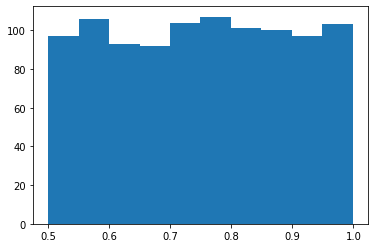

In [2]:
# bootstrap confidence intervals
from numpy.random import seed, rand, randint
from numpy import mean, median, percentile

# seed the random number generator
seed(1)
# generate dataset
dataset = 0.5 + rand(1000) * 0.5

from matplotlib import pyplot

pyplot.hist(dataset)
pyplot.show()


In [3]:
# bootstrap
scores = list()
for _ in range(100):
    # bootstrap sample
    indices = randint(0, 1000, 1000)
    sample = dataset[indices]
    #print('sample size:', len(sample))
    # calculate and store statistic
    statistic = mean(sample)
    scores.append(statistic)

## Size of the bootstraped samples could be = whole dataset size; lo que pasa es que hay repetición de puntos

In [4]:
print('mean of the population = %.3f' % mean(dataset))
print('50th percentile (median) of the bootstrap samples means = %.3f' % median(scores))


mean of the population = 0.750
50th percentile (median) of the bootstrap samples means = 0.750


In [5]:
# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0
# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2
# retrieve observation at lower percentile
lower = max(0.0, percentile(scores, lower_p))
print('%.1fth percentile = %.3f' % (lower_p, lower))
# calculate upper percentile (e.g. 97.5)
upper_p = (100 - alpha / 2.0)
# retrieve observation at upper percentile
upper = min(1.0, percentile(scores, upper_p))
print('%.1fth percentile = %.3f' % (upper_p, upper))


2.5th percentile = 0.741
97.5th percentile = 0.757


Hasta aquí tenemos un ejemplo de obtención de la estimación de un parámetro (en este caso el valor medio de una 
población) a partir del resampleo (mediante bootstrapping) de los datos, estimado como el valor mediano de las medias 
de dichas muestras <p>
Ahora vamos a aplicar este método para estimar, en lugar de la media de una población, los coeficientes de una
regresión

### Generación del dataset:

x: mean=100.776 stdv=19.620
y: mean=151.050 stdv=22.358


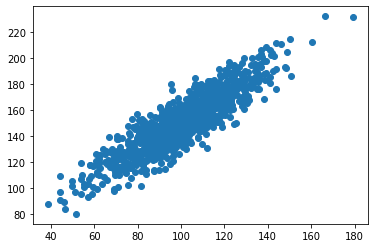

In [6]:
from numpy.random import randn
from numpy import std
from scipy.stats import linregress
# seed random number generator
seed(1)
# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)
# summarize
print('x: mean=%.3f stdv=%.3f' % (mean(x), std(x)))
print('y: mean=%.3f stdv=%.3f' % (mean(y), std(y)))
# plot
pyplot.scatter(x, y)
pyplot.show()


 Make model fit with the whole dataset

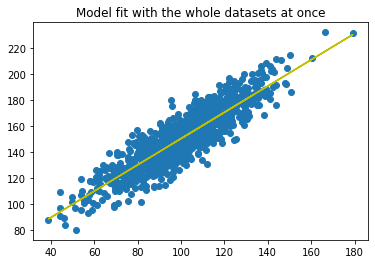

In [7]:
b1, b0, r_value, p_value, std_err = linregress(x, y)

yhat_whole_ds = b0 + b1 * x
# plot data and predictions
pyplot.scatter(x, y)
pyplot.plot(x, yhat_whole_ds, color='y')
pyplot.title('Model fit with the whole datasets at once')
pyplot.show()


In [8]:
import numpy as np 

regression_scores = list()
for _ in range(100):
    # bootstrap sample
    indices = randint(0, 1000, 50)
    x_sample = x[indices]
    y_sample = y[indices]
    
    # simple linear regression model
    b1_sample, b0_sample, r_value, p_value, std_err = linregress(x_sample, y_sample)
    regression_scores.append([b1_sample, b0_sample])

b0_scores = np.array(regression_scores)[:, 1]
b1_scores = np.array(regression_scores)[:, 0]


In [9]:
b0_estimate = median(b0_scores)
print('b0 50th percentile (median) = %.3f' % median(b0_scores))
# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0
# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2.0
# retrieve observation at lower percentile
#b0_lower = max(0.0, percentile(b0_scores, lower_p))
perc_5th = percentile(b0_scores, lower_p)
#print('%.1fth percentile = %.3f' % (lower_p, b0_lower))
# calculate upper percentile (e.g. 97.5)
upper_p = 100 - (alpha / 2.0)
# retrieve observation at upper percentile
#b0_upper = min(1.0, percentile(b0_scores, upper_p))
perc_95th = percentile(b0_scores, upper_p)
#print('%.1fth percentile = %.3f' % (upper_p, b0_upper))
print('confidence interval: ', [perc_5th.round(2), perc_95th.round(2)])
print('b0 estimate: ', [perc_5th.round(2), b0_estimate.round(2), perc_95th.round(2)])


b0 50th percentile (median) = 48.889
confidence interval:  [33.28, 65.0]
b0 estimate:  [33.28, 48.89, 65.0]


In [10]:
b1_estimate = median(b1_scores)
print('b1 50th percentile (median) = %.3f' % median(b1_scores))
# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0
# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2.0
# retrieve observation at lower percentile
#b1_lower = max(0.0, percentile(b1_scores, lower_p))
perc_5th = percentile(b1_scores, lower_p)
#print('%.1fth percentile = %.3f' % (lower_p, b1_lower))
# calculate upper percentile (e.g. 97.5)
upper_p = 100 - (alpha / 2.0)
# retrieve observation at upper percentile
#b1_upper = min(1.0, percentile(b1_scores, upper_p))
perc_95th = percentile(b1_scores, upper_p)
#print('%.1fth percentile = %.3f' % (upper_p, b1_upper))
print('confidence interval: ', [perc_5th.round(2), perc_95th.round(2)])
print('b1 estimate: ', [perc_5th.round(2), b1_estimate.round(2), perc_95th.round(2)])


b1 50th percentile (median) = 1.011
confidence interval:  [0.87, 1.15]
b1 estimate:  [0.87, 1.01, 1.15]


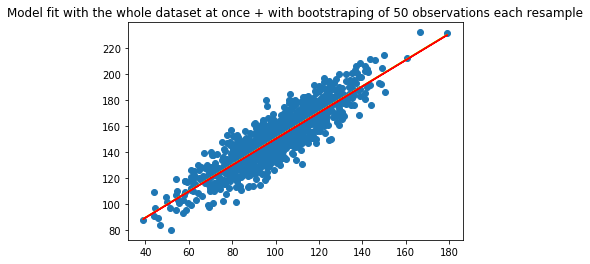

In [11]:
# Make model fit with the whole dataset
b1, b0, r_value, p_value, std_err = linregress(x, y)
yhat_whole_ds = b0 + b1 * x
yhat_bootstrapped = b0_estimate + b1_estimate * x
# plot data and predictions
pyplot.scatter(x, y)
pyplot.plot(x, yhat_whole_ds, color='y')
pyplot.plot(x, yhat_bootstrapped, color='r')
pyplot.title('Model fit with the whole dataset at once + with bootstraping of 50 observations each resample')
pyplot.show()


# Check: se está ajustando el modelo correctamente mediante bootstrapping?
 Make model fit with the whole dataset

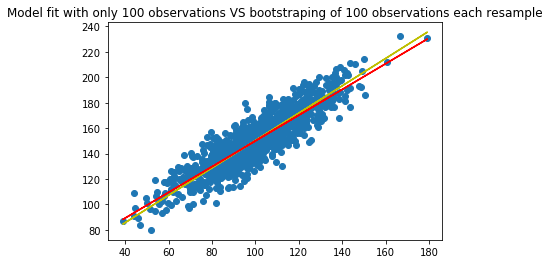

In [12]:
b1, b0, r_value, p_value, std_err = linregress(x[:100], y[:100])

yhat_sub_ds = b0 + b1 * x
# plot data and predictions
pyplot.scatter(x, y)
pyplot.plot(x, yhat_sub_ds, color='y')
pyplot.plot(x, yhat_bootstrapped, color='r')
pyplot.title('Model fit with only 100 observations VS bootstraping of 100 observations each resample')
pyplot.show()


# We now train with the whole dataset, but the sample sizes in the bootstrapping methodology uses 100-sized samples:

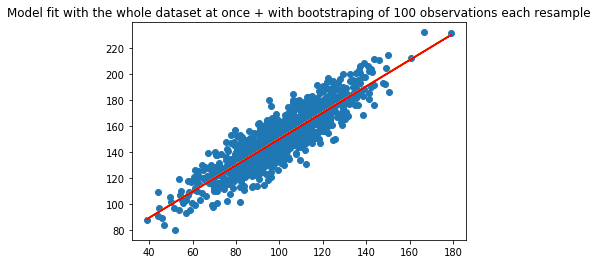

In [13]:
b1, b0, r_value, p_value, std_err = linregress(x, y)

yhat_whole_ds = b0 + b1 * x
yhat_bootstrapped = b0_estimate + b1_estimate * x
# plot data and predictions
pyplot.scatter(x, y)
pyplot.plot(x, yhat_whole_ds, color='y')
pyplot.plot(x, yhat_bootstrapped, color='r')
pyplot.title('Model fit with the whole dataset at once + with bootstraping of 100 observations each resample')
pyplot.show()


We now train with the whole dataset, but the sample sizes in the bootstrapping methodology uses several-sized samples:
 WITH WHOLE DATASET

In [109]:
b1, b0, r_value, p_value, std_err = linregress(x, y)
yhat_whole_ds = b0 + b1 * x

### WITH BOOTSTRAP SAMPLES 
regression_scores = list()
for _ in range(50):
    # bootstrap sample
    indices = randint(0, 1000, 40)
    x_sample = x[indices]
    y_sample = y[indices]
    
    # simple linear regression model
    b1_sample, b0_sample, r_value, p_value, std_err = linregress(x_sample, y_sample)
    regression_scores.append([b1_sample, b0_sample])

b0_scores = np.array(regression_scores)[:, 1]
b1_scores = np.array(regression_scores)[:, 0]
b0_estimate = median(b0_scores)
b1_estimate = median(b1_scores)

yhat_bootstrapped = b0_estimate + b1_estimate * x

### MODELS VALIDATION
from sklearn.metrics import mean_squared_error

yhat_whole_ds_rmse = mean_squared_error(y, yhat_whole_ds).round(2)
yhat_bootstrapped_rmse = mean_squared_error(y, yhat_bootstrapped).round(2)



In [110]:
### PLOTS
import plotly.graph_objects as go

fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='markers',
                    name='ground_truth'))
fig.add_trace(go.Scatter(x=x, y=yhat_whole_ds,
                    mode='lines+markers',
                    name='yhat_whole_ds'))
fig.add_trace(go.Scatter(x=x, y=yhat_bootstrapped,
                    mode='lines+markers',
                    name='yhat_bootstrapped'))
fig.update_layout(annotations=[dict(xref='paper',
                                    yref='paper',
                                    x=0.5, y=1,
                                    showarrow=False,
                                    text='bootstrap size: 40, 50 iters, yhat_whole_ds_rmse: {}, yhat_bootstr_rmse: {}'.format(yhat_whole_ds_rmse, 
                                                                                                yhat_bootstrapped_rmse))])

fig.show()

## Parece que el número de iteraciones de bootstrap influye bastante

In [111]:
b1, b0, r_value, p_value, std_err = linregress(x, y)
yhat_whole_ds = b0 + b1 * x

### WITH BOOTSTRAP SAMPLES 
regression_scores = list()
for _ in range(800):
    # bootstrap sample
    indices = randint(0, 1000, 40)
    x_sample = x[indices]
    y_sample = y[indices]
    
    # simple linear regression model
    b1_sample, b0_sample, r_value, p_value, std_err = linregress(x_sample, y_sample)
    regression_scores.append([b1_sample, b0_sample])

b0_scores = np.array(regression_scores)[:, 1]
b1_scores = np.array(regression_scores)[:, 0]
b0_estimate = median(b0_scores)
b1_estimate = median(b1_scores)

yhat_bootstrapped = b0_estimate + b1_estimate * x

### MODELS VALIDATION
from sklearn.metrics import mean_squared_error

yhat_whole_ds_rmse = mean_squared_error(y, yhat_whole_ds).round(2)
yhat_bootstrapped_rmse = mean_squared_error(y, yhat_bootstrapped).round(2)


In [112]:
### PLOTS
import plotly.graph_objects as go

fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='markers',
                    name='ground_truth'))
fig.add_trace(go.Scatter(x=x, y=yhat_whole_ds,
                    mode='lines+markers',
                    name='yhat_whole_ds'))
fig.add_trace(go.Scatter(x=x, y=yhat_bootstrapped,
                    mode='lines+markers',
                    name='yhat_bootstrapped'))
fig.update_layout(annotations=[dict(xref='paper',
                                    yref='paper',
                                    x=0.5, y=1,
                                    showarrow=False,
                                    text='bootstrap size: 40, 800 iters, yhat_whole_ds_rmse: {}, yhat_bootstr_rmse: {}'.format(yhat_whole_ds_rmse, 
                                                                                                yhat_bootstrapped_rmse))])

fig.show()

In [117]:
b1, b0, r_value, p_value, std_err = linregress(x, y)
yhat_whole_ds = b0 + b1 * x

### WITH BOOTSTRAP SAMPLES 
regression_scores = list()
for _ in range(80):
    # bootstrap sample
    indices = randint(0, 1000, 400)
    x_sample = x[indices]
    y_sample = y[indices]
    
    # simple linear regression model
    b1_sample, b0_sample, r_value, p_value, std_err = linregress(x_sample, y_sample)
    regression_scores.append([b1_sample, b0_sample])

b0_scores = np.array(regression_scores)[:, 1]
b1_scores = np.array(regression_scores)[:, 0]
b0_estimate = median(b0_scores)
b1_estimate = median(b1_scores)

yhat_bootstrapped = b0_estimate + b1_estimate * x

### MODELS VALIDATION
from sklearn.metrics import mean_squared_error

yhat_whole_ds_rmse = mean_squared_error(y, yhat_whole_ds).round(2)
yhat_bootstrapped_rmse = mean_squared_error(y, yhat_bootstrapped).round(2)


In [118]:
### PLOTS
import plotly.graph_objects as go

fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='markers',
                    name='ground_truth'))
fig.add_trace(go.Scatter(x=x, y=yhat_whole_ds,
                    mode='lines+markers',
                    name='yhat_whole_ds'))
fig.add_trace(go.Scatter(x=x, y=yhat_bootstrapped,
                    mode='lines+markers',
                    name='yhat_bootstrapped'))
fig.update_layout(annotations=[dict(xref='paper',
                                    yref='paper',
                                    x=0.5, y=1,
                                    showarrow=False,
                                    text='bootstrap size: 400, 800 iters, yhat_whole_ds_rmse: {}, yhat_bootstr_rmse: {}'.format(yhat_whole_ds_rmse, 
                                                                                                yhat_bootstrapped_rmse))])

fig.show()

Parece que el aumentar el tamaño de la muestra bootstrap un orden de magnitud mejora sustancialmente (hayq ue checkearlo con hypothesis testing) 

In [119]:
b1, b0, r_value, p_value, std_err = linregress(x, y)
yhat_whole_ds = b0 + b1 * x

### WITH BOOTSTRAP SAMPLES 
regression_scores = list()
for _ in range(1000):
    # bootstrap sample
    indices = randint(0, 1000, 40)
    x_sample = x[indices]
    y_sample = y[indices]
    
    # simple linear regression model
    b1_sample, b0_sample, r_value, p_value, std_err = linregress(x_sample, y_sample)
    regression_scores.append([b1_sample, b0_sample])

b0_scores = np.array(regression_scores)[:, 1]
b1_scores = np.array(regression_scores)[:, 0]
b0_estimate = median(b0_scores)
b1_estimate = median(b1_scores)

yhat_bootstrapped = b0_estimate + b1_estimate * x

### MODELS VALIDATION
from sklearn.metrics import mean_squared_error

yhat_whole_ds_rmse = mean_squared_error(y, yhat_whole_ds).round(2)
yhat_bootstrapped_rmse = mean_squared_error(y, yhat_bootstrapped).round(2)


In [129]:
### PLOTS
import plotly.graph_objects as go

fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='markers',
                    name='ground_truth'))
fig.add_trace(go.Scatter(x=x, y=yhat_whole_ds,
                    mode='lines+markers',
                    name='yhat_whole_ds'))
fig.add_trace(go.Scatter(x=x, y=yhat_bootstrapped,
                    mode='lines+markers',
                    name='yhat_bootstrapped'))
fig.update_layout(annotations=[dict(xref='paper',
                                    yref='paper',
                                    x=0.5, y=1,
                                    showarrow=False,
                                    text='bootstrap size: 40, 1000 iters, yhat_whole_ds_rmse: {}, yhat_bootstr_rmse: {}'.format(yhat_whole_ds_rmse, 
                                                                                                yhat_bootstrapped_rmse))])

fig.show()

En cambio parece que es menos determinante el número de iteraciones que el tamaño de las bootstrap samples --> checkear con varios valores y montar gráfica de comparación bootstrap_sample VS iters_number, etc

In [136]:
b1, b0, r_value, p_value, std_err = linregress(x, y)
yhat_whole_ds = b0 + b1 * x

### WITH BOOTSTRAP SAMPLES 
regression_scores = list()
for _ in range(500):
    # bootstrap sample
    indices = randint(0, 1000, 400)
    x_sample = x[indices]
    y_sample = y[indices]
    
    # simple linear regression model
    b1_sample, b0_sample, r_value, p_value, std_err = linregress(x_sample, y_sample)
    regression_scores.append([b1_sample, b0_sample])

b0_scores = np.array(regression_scores)[:, 1]
b1_scores = np.array(regression_scores)[:, 0]
b0_estimate = median(b0_scores)
b1_estimate = median(b1_scores)

yhat_bootstrapped = b0_estimate + b1_estimate * x

### MODELS VALIDATION
from sklearn.metrics import mean_squared_error

yhat_whole_ds_rmse = mean_squared_error(y, yhat_whole_ds).round(2)
yhat_bootstrapped_rmse = mean_squared_error(y, yhat_bootstrapped).round(2)

### PLOTS
import plotly.graph_objects as go

fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='markers',
                    name='ground_truth'))
fig.add_trace(go.Scatter(x=x, y=yhat_whole_ds,
                    mode='lines+markers',
                    name='yhat_whole_ds'))
fig.add_trace(go.Scatter(x=x, y=yhat_bootstrapped,
                    mode='lines+markers',
                    name='yhat_bootstrapped'))
fig.update_layout(annotations=[dict(xref='paper',
                                    yref='paper',
                                    x=0.5, y=1,
                                    showarrow=False,
                                    text='bootstrap size: 400, 500 iters, yhat_whole_ds_rmse: {}, yhat_bootstr_rmse: {}'.format(yhat_whole_ds_rmse, 
                                                                                                yhat_bootstrapped_rmse))])

fig.show()

Aumentar ambos tamaño y númeor de iters mejora sustancialmente, como esperábamos

Bootstrapping shows us that, even with 50-obervations sized-samples, we get a very good aproximation to the 
right linear regression model, whereas using a 100 sized-sample to train only once is not enough, as expected.

Bootstrapping shows an excellent performance when applying this to samples with the size half of the dataset for instance; 
look for a good compromise to prevent overfitting, but good performance... 

# PLOT CONFIDENCE INTERVAL IN BETWEEN CONFIDENCE INTERVAL LIMITS

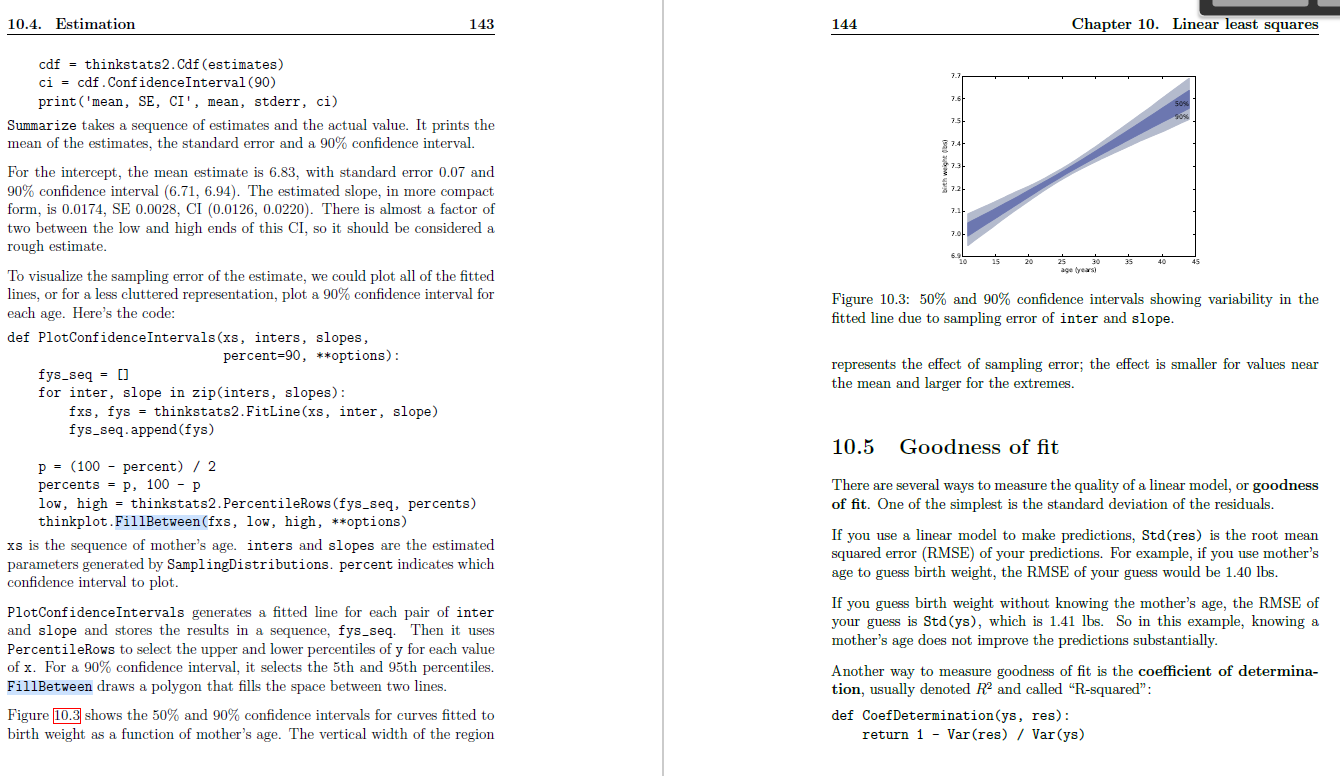

In [19]:
from IPython.display import Image
Image("..\pics\plot_confidence_interval.PNG", width=1, height=3)


In [20]:
b0_estimate = median(b0_scores)
print('b0 50th percentile (median) = %.3f' % median(b0_scores))
alpha = 1.0
lower_p = alpha / 2.0
perc_5th = percentile(b0_scores, lower_p)
upper_p = 100 - (alpha / 2.0)
perc_95th = percentile(b0_scores, upper_p)
print('confidence interval: ', [perc_5th.round(2), perc_95th.round(2)])
print('b0 estimate: ', [perc_5th.round(2), b0_estimate.round(2), perc_95th.round(2)])

b1_estimate = median(b1_scores)
print('b1 50th percentile (median) = %.3f' % median(b1_scores))
alpha = 1.0
lower_p = alpha / 2.0
perc_5th = percentile(b1_scores, lower_p)
upper_p = 100 - (alpha / 2.0)
perc_95th = percentile(b1_scores, upper_p)
print('confidence interval: ', [perc_5th.round(2), perc_95th.round(2)])
print('b1 estimate: ', [perc_5th.round(2), b1_estimate.round(2), perc_95th.round(2)])


b0 50th percentile (median) = 48.994
confidence interval:  [43.86, 53.22]
b0 estimate:  [43.86, 48.99, 53.22]
b1 50th percentile (median) = 1.013
confidence interval:  [0.97, 1.06]
b1 estimate:  [0.97, 1.01, 1.06]


In [21]:
yhat_bootstrapped_predictions_low_values = []
yhat_bootstrapped_predictions_high_values = []

import pandas as pd
slope_intercept_pairs_df = pd.DataFrame({'b0_scores': b0_scores, 'b1_scores': b1_scores})
#slope_intercept_pairs = zip(b0_scores, b1_scores)
for x_value in x:
    #for each x value, we calculate all possible predictions from the bootstrapped estimates
    preds_for_this_x = []
    for index in slope_intercept_pairs_df.index:
        #print(x_value)
        interc = slope_intercept_pairs_df.iloc[index]['b0_scores']
        slope = slope_intercept_pairs_df.iloc[index]['b1_scores']

        y_pred = interc + slope*x_value
        preds_for_this_x.append(y_pred)
  
    perc_5th_value = percentile(preds_for_this_x, lower_p)
    perc_95th_value = percentile(preds_for_this_x, upper_p)

    yhat_bootstrapped_predictions_low_values.append(perc_5th_value)
    yhat_bootstrapped_predictions_high_values.append(perc_95th_value)


In [22]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=yhat_bootstrapped_predictions_low_values,
    fill=None,
    mode='lines',
    line_color='indigo',
    ))

fig.add_trace(go.Scatter(x=x, y=yhat_bootstrapped_predictions_high_values,
    fill='tonexty', # fill area between yhat_bootstrapped_predictions_low_values and yhat_bootstrapped_predictions_high_values
    mode='lines', line_color='indigo'))

fig.update_layout(annotations=[dict(xref='paper',
                                    yref='paper',
                                    x=0.5, y=1,
                                    showarrow=False,
                                    text='99% confidence interval')])

fig.show()


####################################################################

## And for prediction intervals, assuming we are interested in 3 input values

In [81]:
import numpy as np
from scipy.stats import linregress

regression_scores = list()
example_values_to_predict_its_intervals = np.array([x[30].round(2), x[int(len(x)/2)].round(2), 130])
print('values to predict on: {}'.format(example_values_to_predict_its_intervals))

regression_scores = list()
predictions_with_residuals = list()
for _ in range(500):
    # 1.- take a bootstrap sample
    indices = randint(0, 1000, 500)
    x_sample = x[indices]
    y_sample = y[indices]
    # 2.- fit simple linear regression model
    b1_sample, b0_sample, r_value, p_value, std_err = linregress(x_sample, y_sample)
    regression_scores.append([b1_sample, b0_sample])
    #print('b1_sample: {}'.format(b1_sample))
    yhat_bootstrapped_sample = b0_sample + (np.multiply(b1_sample, x_sample))
    # 3.- find residuals:
    bootstrap_model_residuals = yhat_bootstrapped_sample - y_sample
    # 4.- take 3 random residuals
    three_random_residuals =np.random.choice(bootstrap_model_residuals, 3)
    # 5.- add each of the 3 residuals to the prediction of the 3 input values of interest
    bootst_predictions = b0_sample + b1_sample * example_values_to_predict_its_intervals
    bootst_predictions_with_residuals = bootst_predictions + three_random_residuals
    predictions_with_residuals.append(bootst_predictions_with_residuals)

predictions_with_residuals=np.array(predictions_with_residuals)
predictions_with_residuals


values to predict on: [ 86.17  65.61 130.  ]


array([[130.62436146,  93.6829707 , 188.14416426],
       [122.12006989, 119.62683154, 171.10782134],
       [118.18344003, 116.3555342 , 186.90881365],
       ...,
       [137.15091156, 102.58045199, 180.67190558],
       [141.77304117, 118.11558955, 146.52470997],
       [151.34526292, 135.60988614, 172.24383519]])

### Esto para plotear la regresión estimada:

In [82]:
b0_scores = np.array(regression_scores)[:, 1]
b1_scores = np.array(regression_scores)[:, 0]
b0_estimate = median(b0_scores)
b1_estimate = median(b1_scores)

yhat_bootstrapped = b0_estimate + b1_estimate * x


## The 2.5% - 97.5% PI

In [83]:
pred_int_x1 = (np.percentile(predictions_with_residuals[:, 0], 2.5), 
               np.percentile(predictions_with_residuals[:, 0], 50),
               np.percentile(predictions_with_residuals[:, 0], 97.5))

print('pred_int_x1: {}'.format(pred_int_x1))

pred_int_x2 = (np.percentile(predictions_with_residuals[:, 1], 2.5), 
               np.percentile(predictions_with_residuals[:, 1], 50),
               np.percentile(predictions_with_residuals[:, 1], 97.5))

print('pred_int_x2: {}'.format(pred_int_x2))

pred_int_x3 = (np.percentile(predictions_with_residuals[:, 2], 2.5), 
               np.percentile(predictions_with_residuals[:, 2], 50),
               np.percentile(predictions_with_residuals[:, 2], 97.5))

print('pred_int_x3: {}'.format(pred_int_x3))


pred_int_x1: (115.56996255879994, 135.99512188997136, 156.92503296385155)
pred_int_x2: (94.16965931155619, 116.2340753016746, 137.24065157042065)
pred_int_x3: (159.79393741369574, 180.67929267491309, 199.79850758512498)


## VS el resultado obtenido entrenando sobre todo el set:

In [84]:
b1_whole, b0_whole, r_value, p_value, std_err = linregress(x, y)
yhat_whole = b0_whole + (np.multiply(b1_whole, example_values_to_predict_its_intervals))
yhat_whole


array([136.27565194, 115.47973189, 180.60858852])

In [85]:
yhat_medians_boots = [np.percentile(predictions_with_residuals[:, 0], 50), np.percentile(predictions_with_residuals[:, 1], 50), 
                      np.percentile(predictions_with_residuals[:, 2], 50)]

diffs = yhat_whole - yhat_medians_boots
print('con bootstrap samples de tamaño 500, preds_bootstrap_samp - preds_whole_ds: ', diffs)

con bootstrap samples de tamaño 500, preds_bootstrap_samp - preds_whole_ds:  [ 0.28053005 -0.75434341 -0.07070415]


## Assuming we are interested in 3 input values

In [86]:
import numpy as np
from scipy.stats import linregress

regression_scores = list()
example_values_to_predict_its_intervals = np.array([x[30].round(2), x[int(len(x)/2)].round(2), 130])
print('values to predict on: {}'.format(example_values_to_predict_its_intervals))

regression_scores = list()
predictions_with_residuals = list()
for _ in range(500):
    # 1.- take a bootstrap sample
    indices = randint(0, 1000, 700)
    x_sample = x[indices]
    y_sample = y[indices]
    # 2.- fit simple linear regression model
    b1_sample, b0_sample, r_value, p_value, std_err = linregress(x_sample, y_sample)
    regression_scores.append([b1_sample, b0_sample])
    #print('b1_sample: {}'.format(b1_sample))
    yhat_bootstrapped_sample = b0_sample + (np.multiply(b1_sample, x_sample))
    # 3.- find residuals:
    bootstrap_model_residuals = yhat_bootstrapped_sample - y_sample
    # 4.- take 3 random residuals
    three_random_residuals =np.random.choice(bootstrap_model_residuals, 3)
    # 5.- add each of the 3 residuals to the prediction of the 3 input values of interest
    bootst_predictions = b0_sample + b1_sample * example_values_to_predict_its_intervals
    bootst_predictions_with_residuals = bootst_predictions + three_random_residuals
    predictions_with_residuals.append(bootst_predictions_with_residuals)

predictions_with_residuals=np.array(predictions_with_residuals)
predictions_with_residuals


values to predict on: [ 86.17  65.61 130.  ]


array([[128.96990555, 117.32042987, 174.5560363 ],
       [148.87845564, 121.49417201, 168.64167375],
       [151.02952319, 108.85421783, 179.01505897],
       ...,
       [140.97725778, 129.43172597, 183.60556978],
       [125.44170965,  96.93263776, 184.94758949],
       [151.6743013 , 105.26525648, 194.84771981]])

### Esto para plotear la regresión estimada:

In [87]:
b0_scores = np.array(regression_scores)[:, 1]
b1_scores = np.array(regression_scores)[:, 0]
b0_estimate = median(b0_scores)
b1_estimate = median(b1_scores)

yhat_bootstrapped = b0_estimate + b1_estimate * x


## The 2.5% - 97.5% PI

In [88]:
pred_int_x1 = (np.percentile(predictions_with_residuals[:, 0], 2.5), 
               np.percentile(predictions_with_residuals[:, 0], 50),
               np.percentile(predictions_with_residuals[:, 0], 97.5))

print('pred_int_x1: {}'.format(pred_int_x1))

pred_int_x2 = (np.percentile(predictions_with_residuals[:, 1], 2.5), 
               np.percentile(predictions_with_residuals[:, 1], 50),
               np.percentile(predictions_with_residuals[:, 1], 97.5))

print('pred_int_x2: {}'.format(pred_int_x2))

pred_int_x3 = (np.percentile(predictions_with_residuals[:, 2], 2.5), 
               np.percentile(predictions_with_residuals[:, 2], 50),
               np.percentile(predictions_with_residuals[:, 2], 97.5))

print('pred_int_x3: {}'.format(pred_int_x3))


pred_int_x1: (115.88769322631231, 136.6375573599703, 156.11440181334487)
pred_int_x2: (94.10842907372106, 115.99307300683259, 133.97163055474098)
pred_int_x3: (159.81485015939563, 180.16651429305912, 201.12013624356786)


## VS el resultado obtenido entrenando sobre todo el set:

In [89]:
b1_whole, b0_whole, r_value, p_value, std_err = linregress(x, y)
yhat_whole = b0_whole + (np.multiply(b1_whole, example_values_to_predict_its_intervals))
yhat_whole


array([136.27565194, 115.47973189, 180.60858852])

In [90]:
yhat_medians_boots = [np.percentile(predictions_with_residuals[:, 0], 50), np.percentile(predictions_with_residuals[:, 1], 50), 
                      np.percentile(predictions_with_residuals[:, 2], 50)]

diffs = yhat_whole - yhat_medians_boots
print('con bootstrap samples de tamaño 700, preds_bootstrap_samp - preds_whole_ds: ', diffs)


con bootstrap samples de tamaño 700, preds_bootstrap_samp - preds_whole_ds:  [-0.36190542 -0.51334112  0.44207423]


## Y con bootstrap sample = dataset size?

In [93]:
import numpy as np
from scipy.stats import linregress

regression_scores = list()
example_values_to_predict_its_intervals = np.array([x[30].round(2), x[int(len(x)/2)].round(2), 130])
print('values to predict on: {}'.format(example_values_to_predict_its_intervals))

regression_scores = list()
predictions_with_residuals = list()
# source: f_regression_prediction chapter from 'Practical Stats for DS"
for _ in range(500):
    # 1.- take a bootstrap sample
    indices = randint(0, 1000, 1000)
    x_sample = x[indices]
    y_sample = y[indices]
    # 2.- fit simple linear regression model
    b1_sample, b0_sample, r_value, p_value, std_err = linregress(x_sample, y_sample)
    regression_scores.append([b1_sample, b0_sample])
    #print('b1_sample: {}'.format(b1_sample))
    yhat_bootstrapped_sample = b0_sample + (np.multiply(b1_sample, x_sample))
    # 3.- find residuals:
    bootstrap_model_residuals = yhat_bootstrapped_sample - y_sample
    # 4.- take 3 random residuals
    three_random_residuals =np.random.choice(bootstrap_model_residuals, 3)
    # 5.- add each of the 3 residuals to the prediction of the 3 input values of interest
    bootst_predictions = b0_sample + b1_sample * example_values_to_predict_its_intervals
    bootst_predictions_with_residuals = bootst_predictions + three_random_residuals
    predictions_with_residuals.append(bootst_predictions_with_residuals)

predictions_with_residuals=np.array(predictions_with_residuals)

b0_scores = np.array(regression_scores)[:, 1]
b1_scores = np.array(regression_scores)[:, 0]
b0_estimate = median(b0_scores)
b1_estimate = median(b1_scores)

yhat_bootstrapped = b0_estimate + b1_estimate * x

pred_int_x1 = (np.percentile(predictions_with_residuals[:, 0], 2.5), 
               np.percentile(predictions_with_residuals[:, 0], 50),
               np.percentile(predictions_with_residuals[:, 0], 97.5))

print('pred_int_x1: {}'.format(pred_int_x1))

pred_int_x2 = (np.percentile(predictions_with_residuals[:, 1], 2.5), 
               np.percentile(predictions_with_residuals[:, 1], 50),
               np.percentile(predictions_with_residuals[:, 1], 97.5))

print('pred_int_x2: {}'.format(pred_int_x2))

pred_int_x3 = (np.percentile(predictions_with_residuals[:, 2], 2.5), 
               np.percentile(predictions_with_residuals[:, 2], 50),
               np.percentile(predictions_with_residuals[:, 2], 97.5))

print('pred_int_x3: {}'.format(pred_int_x3))


values to predict on: [ 86.17  65.61 130.  ]
pred_int_x1: (116.17000756943101, 136.49204401091544, 156.8107023806086)
pred_int_x2: (95.83876989310158, 115.76963055595172, 135.88304391471024)
pred_int_x3: (160.41151065846043, 180.69629960682565, 200.67666362299084)


In [94]:
b1_whole, b0_whole, r_value, p_value, std_err = linregress(x, y)
yhat_whole = b0_whole + (np.multiply(b1_whole, example_values_to_predict_its_intervals))
yhat_whole

yhat_medians_boots = [np.percentile(predictions_with_residuals[:, 0], 50), np.percentile(predictions_with_residuals[:, 1], 50), 
                      np.percentile(predictions_with_residuals[:, 2], 50)]

diffs = yhat_whole - yhat_medians_boots
print('con bootstrap samples de tamaño 1000, preds_bootstrap_samp - preds_whole_ds: ', diffs)



con bootstrap samples de tamaño 1000, preds_bootstrap_samp - preds_whole_ds:  [-0.21639207 -0.28989867 -0.08771109]


 Cuanto mayor tamaño tengan los bootstrap samples esperamos (como parece pasar) más parecido es el resultado al del entrenamiento con todo set de datos

# Valores de umbrales de los prediction intervals para los puntos de interés:

In [33]:
low_val_1=np.percentile(predictions_with_residuals[:, 0], 2.5)
hig_val_1=np.percentile(predictions_with_residuals[:, 0], 97.5)
low_val_2=np.percentile(predictions_with_residuals[:, 1], 2.5)
hig_val_2=np.percentile(predictions_with_residuals[:, 1], 97.5)
low_val_3=np.percentile(predictions_with_residuals[:, 2], 2.5)
hig_val_3=np.percentile(predictions_with_residuals[:, 2], 97.5)

pred_int_threshold_vals = [low_val_1, hig_val_1, low_val_2, hig_val_2, low_val_3, hig_val_3]


In [34]:
example_values_to_predict_its_intervals=np.array(example_values_to_predict_its_intervals)
example_values_to_predict_its_intervals = np.repeat(example_values_to_predict_its_intervals, 2)


In [35]:
import plotly.graph_objects as go

fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='markers',
                    name='ground_truth'))
fig.add_trace(go.Scatter(x=x, y=yhat_bootstrapped,
                    mode='lines',
                    name='yhat_whole_ds'))
fig.add_trace(go.Scatter(x=example_values_to_predict_its_intervals, y=pred_int_threshold_vals,
                    mode='markers',
                    name='pred_interval_values'))

fig.update_layout(annotations=[dict(xref='paper',
                                    yref='paper',
                                    x=0.5, y=1,
                                    showarrow=False,
                                    text='estimated regression and prediction interval values')])
fig.show()
